In [1]:
%matplotlib inline
import mir_eval, librosa, librosa.display, numpy, matplotlib.pyplot as plt, IPython.display as ipd

In [2]:
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = None

[&larr; Back to Index](index.html)

# Evaluation Example: Onset Detection

[Documentation: `mir_eval.onset`](http://craffel.github.io/mir_eval/#module-mir_eval.onset)

Evaluation method: determine which estimated onsets are “correct”, where correctness is defined as being within a small window of a reference onset.

`mir_eval` finds the largest feasible set of matches using the [Hopcroft-Karp algorithm](https://en.wikipedia.org/wiki/Hopcroft%E2%80%93Karp_algorithm). (See [`_bipartite_match`](https://github.com/craffel/mir_eval/blob/master/mir_eval/util.py#L547).)

Let's evaluate an onset detector on the following audio:

In [3]:
y, sr = librosa.load('audio/simple_piano.wav')

In [4]:
ipd.Audio(y, rate=sr)

## Detect Onsets

Estimate the onsets in the signal using `onset_detect`:

In [5]:
est_onsets = librosa.onset.onset_detect(y=y, sr=sr, units='time')

In [6]:
est_onsets

array([0.27863946, 0.510839  , 0.81269841, 1.021678  , 1.32353741,
       1.50929705, 1.83437642, 2.02013605, 2.36843537, 2.53097506,
       2.87927438, 3.0185941 , 3.36689342, 3.59909297])

Load a fictional reference annotation.

In [7]:
ref_onsets = numpy.array([0, 0.270, 0.510, 1.02,
                          1.50, 2.02, 2.53, 3.01])

Plot the estimated and reference onsets together.

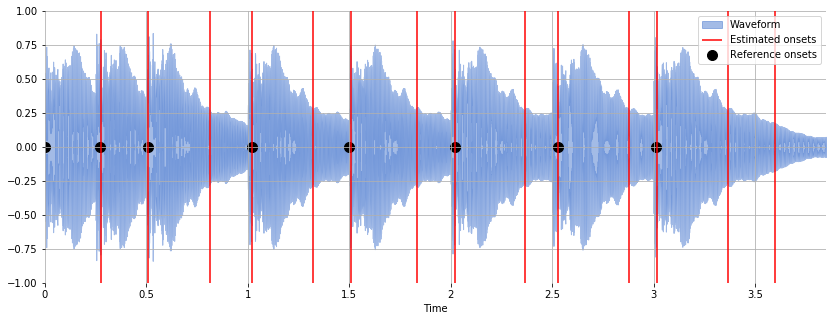

In [8]:
librosa.display.waveplot(y, sr=sr, alpha=0.5)
plt.vlines(est_onsets, -1, 1, color='r')
plt.scatter(ref_onsets, numpy.zeros_like(ref_onsets), color='k', s=100)
plt.legend(['Waveform', 'Estimated onsets', 'Reference onsets']);

## Evaluate

Evaluate using [`mir_eval.onset.evaluate`](https://github.com/craffel/mir_eval/blob/master/mir_eval/onset.py#L101):

In [9]:
mir_eval.onset.evaluate(ref_onsets, est_onsets)

OrderedDict([('F-measure', 0.6363636363636364),
             ('Precision', 0.5),
             ('Recall', 0.875)])

Out of a possible 8 reference onsets, 7 estimated onsets matched, i.e. recall = 7/8 = 0.875.

Out of a possible 14 estimated onsets, 7 reference onsets matched, i.e. precision = 7/14 = 0.5.

The default matching tolerance is 50 milliseconds. To reduce the matching tolerance, adjust the `window` keyword parameter:

In [10]:
mir_eval.onset.evaluate(ref_onsets, est_onsets, window=0.002)

OrderedDict([('F-measure', 0.36363636363636365),
             ('Precision', 0.2857142857142857),
             ('Recall', 0.5)])

[&larr; Back to Index](index.html)